In [1]:
import math
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from time import time
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.neural_network import MLPClassifier as MLP
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from collections import OrderedDict

In [5]:
data = pd.read_csv("C:/Users/Lenovo/Desktop/data/mashroom1.csv")
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     1425 non-null   object
 1   cap-shape                 1425 non-null   object
 2   cap-surface               1425 non-null   object
 3   cap-color                 1425 non-null   object
 4   bruises                   1425 non-null   object
 5   odor                      1425 non-null   object
 6   gill-attachment           1425 non-null   object
 7   gill-spacing              1425 non-null   object
 8   gill-size                 1425 non-null   object
 9   gill-color                1425 non-null   object
 10  stalk-shape               1425 non-null   object
 11  stalk-root                1425 non-null   object
 12  stalk-surface-above-ring  1425 non-null   object
 13  stalk-surface-below-ring  1425 non-null   object
 14  stalk-color-above-ring  

In [8]:
edible_cnt = data[data["class"] == "e"]["class"].count()
poisonus_cnt = data[data["class"] == "p"]["class"].count() 
p_e_ratio = poisonus_cnt/float(edible_cnt)
print("\n'poisonous'-to-'edible' ratio: {}\npoisonus_cnt: {}, edible_cnt: {}".format(p_e_ratio.round(2),poisonus_cnt,edible_cnt))


'poisonous'-to-'edible' ratio: 0.13
poisonus_cnt: 162, edible_cnt: 1263


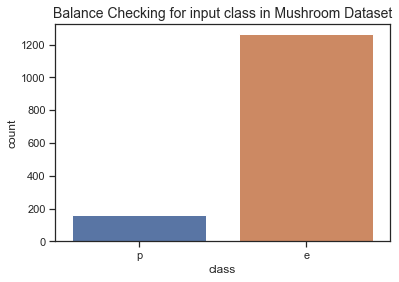

In [9]:
sns.set(style="ticks", color_codes=True)
plt.title("Balance Checking for input class in Mushroom Dataset",fontsize=14)
sns.countplot(x = data["class"], data = data)

In [10]:
columns = data.columns.values
for column in columns:
    print("{0}: {1}".format(column, data[column].unique()))

class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f']
cap-surface: ['s' 'y' 'f']
cap-color: ['n' 'y' 'w' 'g' 'e']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n']
gill-attachment: ['f']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r']
stalk-surface-above-ring: ['s' 'f']
stalk-surface-below-ring: ['s' 'f' 'y']
stalk-color-above-ring: ['w' 'g' 'p']
stalk-color-below-ring: ['w' 'p' 'g']
veil-type: ['p' nan]
veil-color: ['w' nan]
ring-number: ['o' nan]
ring-type: ['p' 'e' nan]
spore-print-color: ['k' 'n' 'u' nan]
population: ['s' 'n' 'a' 'v' 'y' nan]
habitat: ['u' 'g' 'm' 'd' 'p' nan]


In [11]:
print("\n There are {} '?' values in the feature 'stalk-root'.".format(data[data["stalk-root"] == "?"]["stalk-root"].count()))


 There are 0 '?' values in the feature 'stalk-root'.


In [12]:
data = data.drop("veil-type", axis = 1)
data.shape

(1425, 22)

In [13]:
data_onehot = pd.get_dummies(data)


In [14]:
ata_onehot = data_onehot.drop(['class_e'], axis=1)


In [16]:
encoded = list(data_onehot.columns[1:])
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)
data_onehot.head(5)

65 total features after one-hot encoding.
['class_p', 'cap-shape_b', 'cap-shape_f', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_s', 'cap-surface_y', 'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_w', 'cap-color_y', 'bruises_f', 'bruises_t', 'odor_a', 'odor_l', 'odor_n', 'odor_p', 'gill-attachment_f', 'gill-spacing_c', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_p', 'gill-color_u', 'gill-color_w', 'stalk-shape_e', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_f', 'stalk-surface-below-ring_s', 'stalk-surface-below-ring_y', 'stalk-color-above-ring_g', 'stalk-color-above-ring_p', 'stalk-color-above-ring_w', 'stalk-color-below-ring_g', 'stalk-color-below-ring_p', 'stalk-color-below-ring_w', 'veil-color_w', 'ring-number_o', 'ring-type_e', 'ring-type_p', 'spore-print-col

,class_e,class_p,cap-shape_b,cap-shape_f,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_e,...,population_a,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_m,habitat_p,habitat_u
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [17]:
y_onehot = data_onehot['class_p']
X_onehot = data_onehot.drop(['class_p'], axis=1)
X_onehot.head()

,class_e,cap-shape_b,cap-shape_f,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_s,cap-surface_y,cap-color_e,cap-color_g,...,population_a,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_m,habitat_p,habitat_u
0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [18]:
y_onehot.head()

0    1
1    0
2    0
3    1
4    0
Name: class_p, dtype: uint8

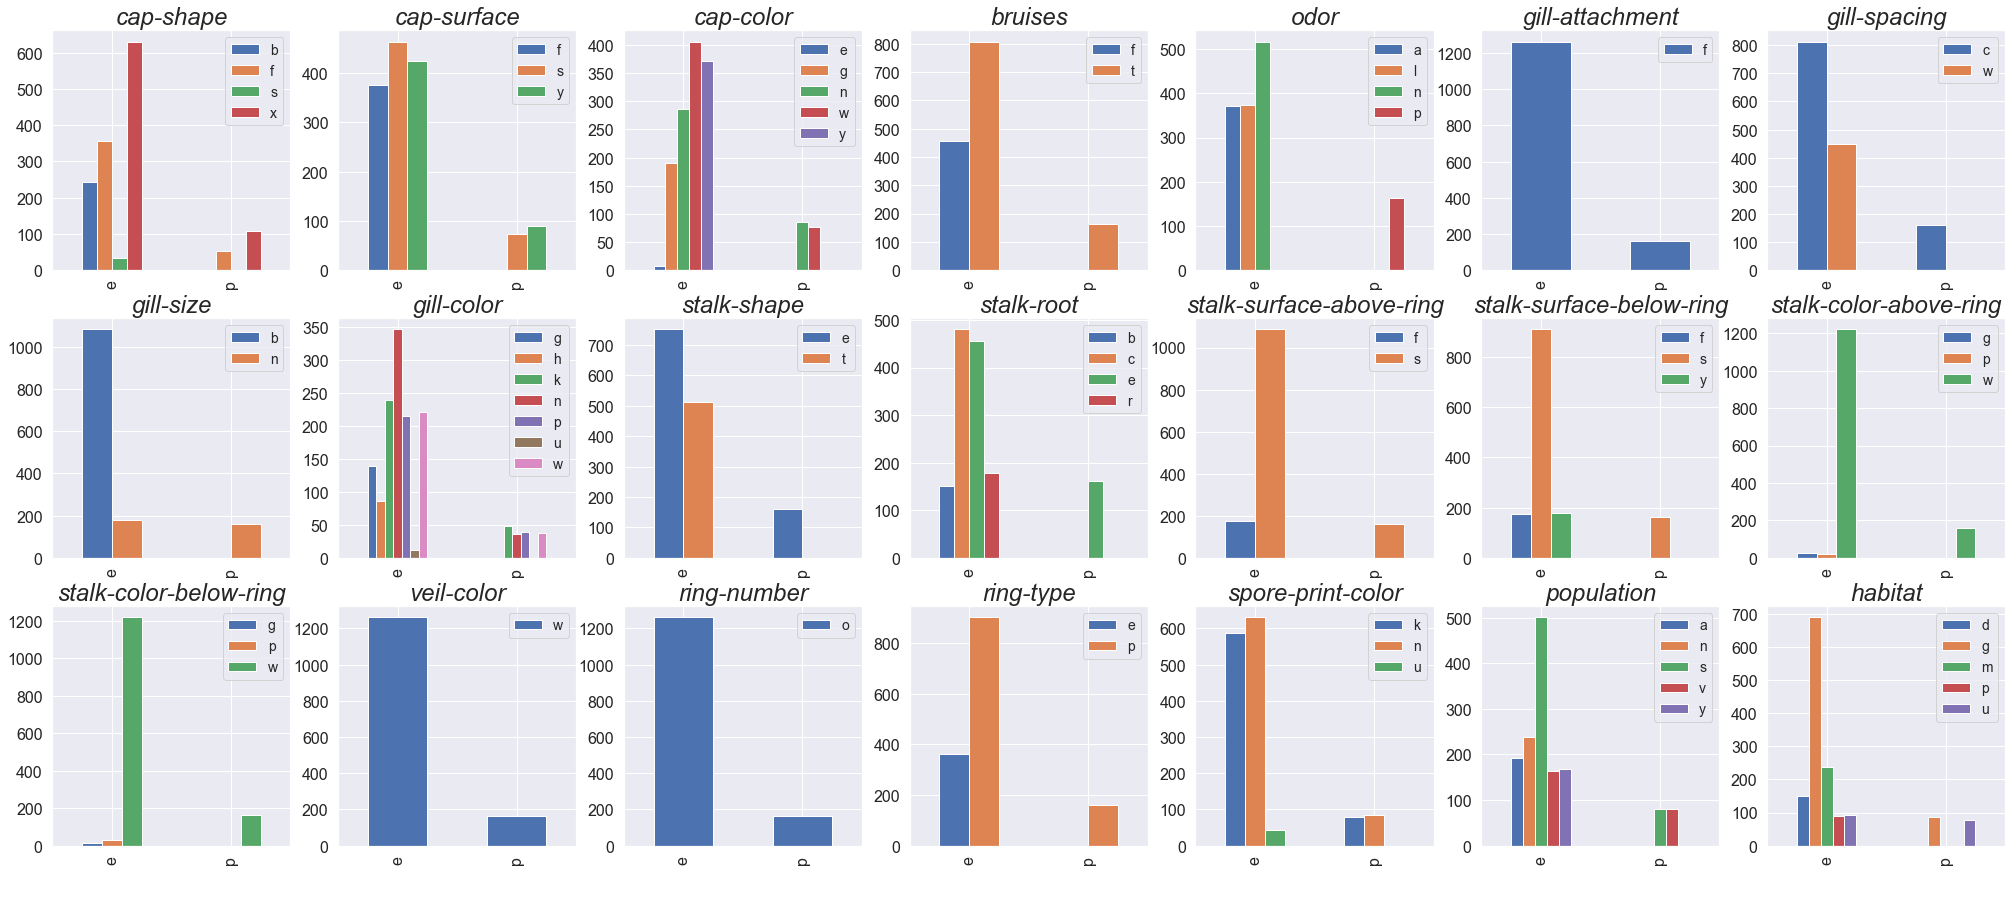

In [22]:
feature_columns = data.columns[1:]
sns.set(style="darkgrid", color_codes=True)
fig, axes = plt.subplots(nrows= 3, ncols=7,figsize=(35, 15))
data['id'] = np.arange(1, data.shape[0] + 1)
for f, ax in zip(feature_columns, axes.ravel()):
    data.groupby(['class', f])['id'].count().unstack(f).plot(kind='bar', ax=ax, legend=True, grid=True,fontsize = 16)
    ax.set_title(f, style='oblique', size=24)
    ax.set_xlabel(' \n', style='italic', size=18)
    ax.legend(fontsize=14)   #for 3*7 change to 14
data = data.drop("id",axis = 1) 

In [104]:
corr = data_onehot.corr().loc[:,'class_p']
top_10_corr =corr.abs().sort_values(ascending=False).head(n=11).iloc[1:]
print ('Top-10 features to class_p correlation:','\n\n',top_10_corr)


Top-10 features to class_p correlation: 

 class_p          1.000000
odor_p           1.000000
gill-size_b      0.636096
gill-size_n      0.636096
stalk-root_e     0.409844
habitat_u        0.388302
population_v     0.311396
odor_n           0.270245
stalk-shape_t    0.268198
stalk-shape_e    0.268198
Name: class_p, dtype: float64


Visualize Top-10 features to class_p correlation: 


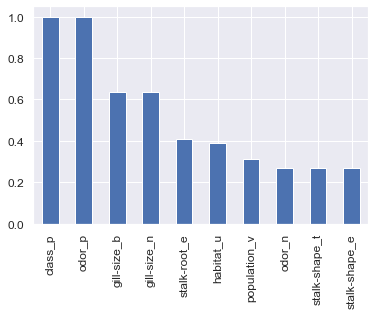

In [100]:

print ("Visualize Top-10 features to class_p correlation: ")
top_10_corr.plot(kind='bar', grid=True,fontsize = 12)

In [26]:
pca = PCA()
pca.fit(X_onehot)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
explained_variance = pca.explained_variance_.round(4)
explained_variance_ratio_ = pca.explained_variance_ratio_.round(4)


In [28]:
ratio_accm_num=0
ratio_accm=[]
for ratio in explained_variance_ratio_:
    ratio_accm_num += ratio
    ratio_accm.append(ratio_accm_num)


In [29]:
print ("explained_variance:\n",explained_variance)
print ("\n\naccumulated explained_variance_ratio:\n",np.array(ratio_accm),"\n\n")



explained_variance:
 [2.435e+00 9.558e-01 7.004e-01 6.122e-01 4.778e-01 4.118e-01 3.896e-01
 2.832e-01 2.652e-01 2.563e-01 2.434e-01 2.249e-01 2.159e-01 1.744e-01
 1.677e-01 1.597e-01 1.309e-01 1.243e-01 1.085e-01 9.640e-02 9.100e-02
 7.870e-02 6.870e-02 6.510e-02 5.950e-02 4.880e-02 4.200e-02 2.890e-02
 2.380e-02 2.100e-02 1.700e-02 1.680e-02 1.450e-02 1.370e-02 8.800e-03
 6.900e-03 3.900e-03 2.400e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00]


accumulated explained_variance_ratio:
 [0.2692 0.3749 0.4523 0.52   0.5728 0.6183 0.6614 0.6927 0.722  0.7503
 0.7772 0.8021 0.826  0.8453 0.8638 0.8815 0.896  0.9097 0.9217 0.9324
 0.9425 0.9512 0.9588 0.966  0.9726 0.978  0.9826 0.9858 0.9884 0.9907
 0.9926 0.9945 0.9961 0.9976 0.9986 0.9994 0.9998 1.0001 1.0001 

<BarContainer object of 65 artists>

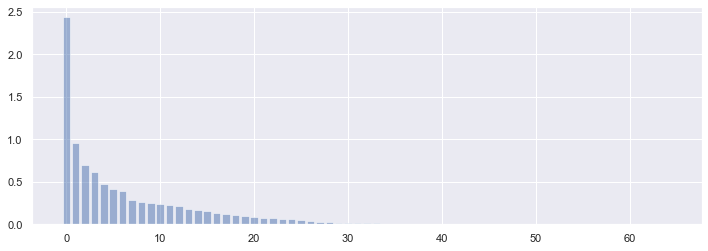

In [34]:
plt.figure(figsize=(12, 4))
plt.bar(range(len(X_onehot.columns)),explained_variance, alpha=0.5, align='center', label='individual explained variance')

Text(0.5, 1.0, 'Explained Variance & Accumulated Ratio by Components')

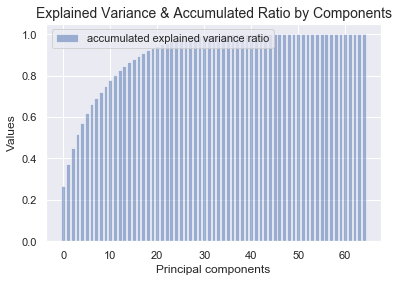

In [35]:
plt.bar(range(len(X_onehot.columns)),ratio_accm, alpha=0.5, align='center', label='accumulated explained variance ratio')
plt.ylabel('Values')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title("Explained Variance & Accumulated Ratio by Components",fontsize=14)

In [36]:
def X_PCA(data,n):
    pca = PCA(n)
    pca.fit(X_onehot)
    X_pca_ = pca.transform(data)

    column_head=[]
    for i in range(X_pca_.shape[1]):
        column_head.append("dimension_"+str(i+1))

    X_pca_ = pd.DataFrame(X_pca_, columns=column_head)
    return X_pca_

X_onehot_pca = X_PCA(X_onehot,n=.6)
X_onehot_pca.head()

,dimension_1,dimension_2,dimension_3,dimension_4,dimension_5,dimension_6
0,-0.586688,1.611413,-0.358801,-1.610299,0.309033,-0.693748
1,-1.174226,-0.742555,-0.743037,0.125157,-0.546226,0.276903
2,-1.403108,-0.763158,-1.224994,0.265491,-0.416358,0.654589
3,-0.865589,1.488214,-0.109095,-1.392016,0.319352,-0.713172
4,2.230764,-0.498536,-0.612365,-0.013292,-0.576798,0.218672


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_onehot,y_onehot,test_size = 0.3,random_state = 42)
print ('X_train Shape:', X_train.shape)
print ('X_test Shape:', X_test.shape)
print ('y_train Shape:', y_train.shape)
print ('y_test Shape:', y_test.shape)

X_train Shape: (997, 65)
X_test Shape: (428, 65)
y_train Shape: (997,)
y_test Shape: (428,)


In [38]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_onehot_pca,y_onehot,test_size = 0.3,random_state = 42)
print ('X_train_pca Shape:', X_train_pca.shape)
print ('X_test_pca Shape:', X_test_pca.shape)
print ('y_train_pca Shape:', y_train_pca.shape)
print ('y_test_pca Shape:', y_test_pca.shape)

X_train_pca Shape: (997, 6)
X_test_pca Shape: (428, 6)
y_train_pca Shape: (997,)
y_test_pca Shape: (428,)
